## Code

### Libs

In [20]:
from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt
import pandas as pd

### Helping stuff

In [21]:
def confusion_matrix(actual, pred):
    cm = [[0 for j in range(NUM_CLASSES)] for i in range(NUM_CLASSES)]
    most_similar = [(-1, 0.0) for i in range(NUM_CLASSES * NUM_CLASSES)]

    for (i, labels_prob) in enumerate(pred):
        label = K.argmax(labels_prob)
        cm[actual[i]][label] += 1

        if labels_prob[label] > most_similar[actual[i] * NUM_CLASSES + label][1]:
            most_similar[actual[i] * NUM_CLASSES + label] = (i, labels_prob[label])

    return cm, most_similar

In [22]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
NUM_CLASSES = 10

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
train_images = train_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

best_model = None
best_acc = 0.0

## Results

### Processing

In [24]:
print("conv -> pool")
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nerr on test data :', 1 - test_acc)

if test_acc > best_acc: best_model = model

conv -> pool
Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4259 - accuracy: 0.8517
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2993 - accuracy: 0.8932
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2659 - accuracy: 0.9063
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2442 - accuracy: 0.9128
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2300 - accuracy: 0.9183
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2156 - accuracy: 0.9226
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2027 - accuracy: 0.9273
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1925 - accuracy: 0.9310
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1816 - accuracy: 0.9348
Epoch 10/10
1875/1875 [============================

In [25]:
print("conv -> pool -> conv")
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nerr on test data :', 1 - test_acc)

if test_acc > best_acc: best_model = model

conv -> pool -> conv
Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3894 - accuracy: 0.8622
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2578 - accuracy: 0.9073
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2185 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1887 - accuracy: 0.9310
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1615 - accuracy: 0.9413
Epoch 6/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1419 - accuracy: 0.9490
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1224 - accuracy: 0.9557
Epoch 8/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1062 - accuracy: 0.9621
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0940 - accuracy: 0.9659
Epoch 10/10
1875/1875 [====================

In [26]:
print("conv -> conv -> pool")
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nerr on test data :', 1 - test_acc)

if test_acc > best_acc: best_model = model

conv -> conv -> pool
Epoch 1/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.3752 - accuracy: 0.8676
Epoch 2/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2489 - accuracy: 0.9105
Epoch 3/10
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2051 - accuracy: 0.9255
Epoch 4/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.1726 - accuracy: 0.9378
Epoch 5/10
1875/1875 [==============================] - 172s 92ms/step - loss: 0.1452 - accuracy: 0.9481
Epoch 6/10
1875/1875 [==============================] - 170s 90ms/step - loss: 0.1224 - accuracy: 0.9551
Epoch 7/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.1042 - accuracy: 0.9618
Epoch 8/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0893 - accuracy: 0.9678
Epoch 9/10
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0754 - accuracy: 0.9730
Epoch 10/10
1875/1875 [===========

In [27]:
print("conv -> pool -> conv -> pool")
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nerr on test data :', 1 - test_acc)

if test_acc > best_acc: best_model = model

conv -> pool -> conv -> pool
Epoch 1/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3973 - accuracy: 0.8555
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2599 - accuracy: 0.9048
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2159 - accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1840 - accuracy: 0.9319
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1557 - accuracy: 0.9419
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1314 - accuracy: 0.9511
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1113 - accuracy: 0.9590
Epoch 8/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0922 - accuracy: 0.9662
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0781 - accuracy: 0.9705
Epoch 10/10
1875/1875 [============

### Best Results

In [28]:
pred_labels = best_model.predict(test_images)
class_names = ['T-shirt', 'Pants', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Blouse', 'Sneakers', 'Bag', 'Boots']

In [29]:
cm, most_similar = confusion_matrix(test_labels, pred_labels)
print(pd.DataFrame(cm))

     0    1    2    3    4    5    6    7    8    9
0  893    2   16   10    5    0   67    0    7    0
1    0  990    0    5    2    0    2    0    1    0
2   21    1  873    7   40    0   58    0    0    0
3   32    2   14  909   17    0   21    0    5    0
4    1    0   51   18  872    0   58    0    0    0
5    1    0    0    0    0  984    0    9    0    6
6   96    1   53   26   51    0  767    0    6    0
7    0    0    0    0    0    7    0  949    0   44
8    5    0    3    5    4    0    9    3  970    1
9    0    0    0    0    0    2    1   12    0  985


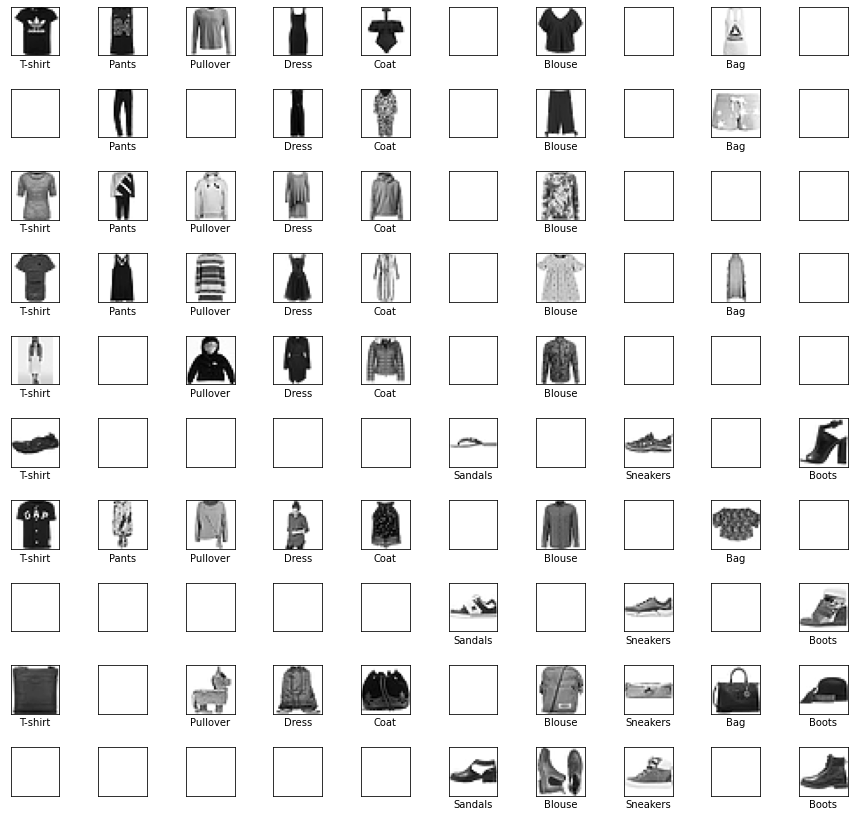

In [30]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
blank_image = [[255 for j in range(28)] for i in range(28)]
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.8, hspace=0.1)
for i in range(NUM_CLASSES * NUM_CLASSES):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if most_similar[i][0] == -1:
        plt.imshow(blank_image, cmap=plt.cm.binary)
        continue
    plt.imshow(test_images[most_similar[i][0]], cmap=plt.cm.binary)
    plt.xlabel(class_names[i % NUM_CLASSES])
plt.show()